In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
tracks = utils.load('data/fma_metadata/tracks.csv')

tracks.shape

(106574, 52)

In [3]:
df=tracks[[('track', 'comments'),('track', 'favorites'),('track', 'interest'),('track', 'listens'),('set', 'subset')]]

In [4]:
df=df.loc[df[('set', 'subset')]!='large']

In [5]:
df=df.drop([('set', 'subset')], axis = 1)

In [6]:
df=df.drop([('track', 'comments'),('track', 'interest')], axis = 1)

In [7]:
X = df[('track', 'listens')].values
y = df[('track', 'favorites')]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [30]:
parameters = {'alpha':[0.001,0.01,0.1,1,10],}

# define the model/ estimator
model = Ridge(random_state=0,normalize=True)

# define the grid search
clf1= GridSearchCV(model, parameters, scoring='neg_mean_absolute_error’',cv=5)

clf1 = clf1.fit(X_train.reshape(-1, 1), y_train)
report(clf1.cv_results_, n_top=10)


ValueError: 'neg_mean_absolute_error’' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [10]:
clf1.cv_results_

{'mean_fit_time': array([0.46396189, 0.00201125, 0.00219431, 0.00199409, 0.00240135]),
 'std_fit_time': array([9.23942065e-01, 2.16834587e-05, 7.45933112e-04, 6.30827292e-04,
        4.83526751e-04]),
 'mean_score_time': array([0.00078993, 0.00078917, 0.00059862, 0.00059891, 0.0007906 ]),
 'std_score_time': array([0.00039526, 0.0003958 , 0.00048877, 0.00048901, 0.0003955 ]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10}],
 'split0_test_score': array([-34.51602652, -34.12340291, -31.12668746, -31.85350113,
        -59.05771806]),
 'split1_test_score': array([-174.58187246, -170.81044267, -139.28456883,  -56.99451911,
        -103.10904675]),
 'split2_test_score': array([ -46.08465565,  -46.39538095,  -50.35193504, -101.40981197,
        -204.3487659 ]),
 'split3_test_s

In [11]:
print(clf1.best_estimator_)


Ridge(alpha=0.1, normalize=True, random_state=0)


In [12]:
reg = LinearRegression()
reg.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [13]:
y_pred_train = reg.predict(X_train.reshape(-1, 1))

print('R2: %.3f' % r2_score(y_train, y_pred_train))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred_train))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred_train))

R2: 0.705
MSE: 81.928
MAE: 2.572


In [14]:
y_pred = reg.predict(X_test.reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.620
MSE: 32.985
MAE: 2.367


In [22]:
reg = Ridge(alpha=0.1,normalize=True,random_state=0)
reg.fit(X_train.reshape(-1, 1), y_train)

Ridge(alpha=0.1, normalize=True, random_state=0)

In [23]:
y_pred_train = reg.predict(X_train.reshape(-1, 1))

print('R2: %.3f' % r2_score(y_train, y_pred_train))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred_train))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred_train))

R2: 0.699
MSE: 83.548
MAE: 2.524


In [24]:
y_pred = reg.predict(X_test.reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.645
MSE: 30.814
MAE: 2.318


In [25]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.00147303]
Intercept: 
 0.04276078974787012


In [15]:
x_values = sorted([v for v in X_test])
y_values = y_pred[np.argsort(X_test)]

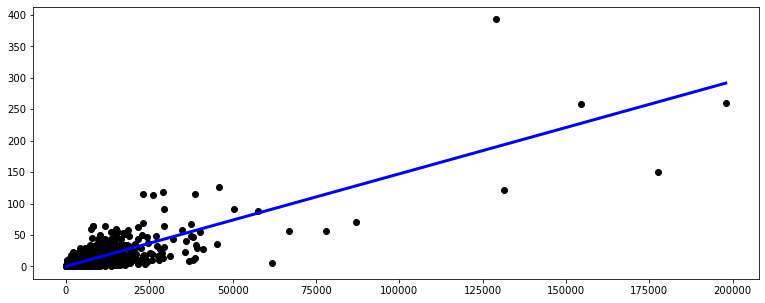

In [16]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(x_values, y_values, color='blue', linewidth=3)
plt.show()

In [18]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],}

# define the model/ estimator
model = Lasso(random_state=0,normalize=True)

# define the grid search
clf1= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

clf1 = clf1.fit(X_train.reshape(-1, 1), y_train)
report(clf1.cv_results_, n_top=10)


Model with rank: 1
Mean validation score: -117.610 (std: 97.832)
Parameters: {'alpha': 0.0001}

Model with rank: 2
Mean validation score: -117.764 (std: 99.105)
Parameters: {'alpha': 0.001}

Model with rank: 3
Mean validation score: -120.634 (std: 114.428)
Parameters: {'alpha': 0.01}

Model with rank: 4
Mean validation score: -242.927 (std: 302.110)
Parameters: {'alpha': 0.1}

Model with rank: 5
Mean validation score: -278.001 (std: 285.982)
Parameters: {'alpha': 1}

Model with rank: 5
Mean validation score: -278.001 (std: 285.982)
Parameters: {'alpha': 10}



In [53]:
reg = Lasso(alpha=0.001,normalize=True,random_state=0)
reg.fit(X_train.reshape(-1, 1), y_train)

Lasso(alpha=0.001, normalize=True, random_state=0)

In [54]:
y_pred_train = reg.predict(X_train.reshape(-1, 1))

print('R2: %.3f' % r2_score(y_train, y_pred_train))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred_train))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred_train))

R2: 0.705
MSE: 81.945
MAE: 2.566


In [55]:
y_pred = reg.predict(X_test.reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.623
MSE: 32.694
MAE: 2.361


In [56]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.00160502]
Intercept: 
 -0.2948602611745992


In [57]:
x_values = sorted([v for v in X_test])
y_values = y_pred[np.argsort(X_test)]

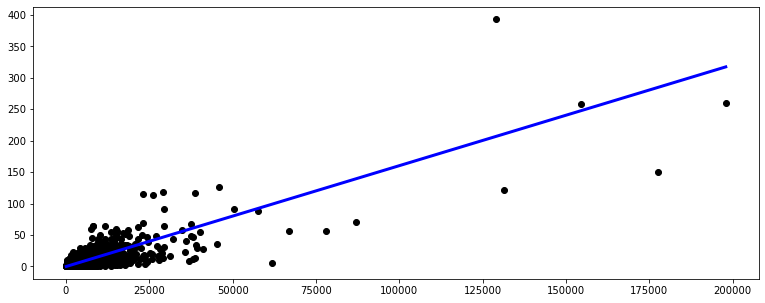

In [58]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(x_values, y_values, color='blue', linewidth=3)
plt.show()